In [1]:
from scipy.integrate import ode, solve_ivp
import os, time
import numpy as np
import matplotlib.pyplot as plt
import pickle
import bisect
from modelJK import ModelJK

Times has been set.


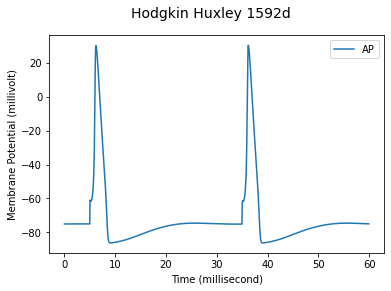

--- 1.1074564456939697 seconds ---


'Hodgkin Huxley 1592d'

In [9]:
'''
Hodgkin Huxley 1592d
'''
model_path = "./mmt-model-files/hh-1952d-modern.mmt"  
start_time = time.time()
model = ModelJK(model_path) 
model.name = "Hodgkin Huxley 1592d"
times = np.linspace(0,60,1000)
model.set_times(times)
d = model.simulate(['engine.pace'], plot=True)    
print("--- %s seconds ---"%(time.time()-start_time))
model.name

Times has been set.


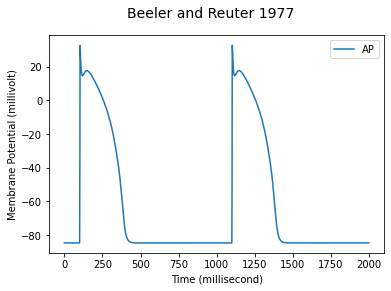

--- 1.0792076587677002 seconds ---


In [3]:
'''
Beeler and Reuter 1977
'''
model_path = "./mmt-model-files/br-1977.mmt" 
start_time = time.time()
model = ModelJK(model_path) 
model.name = "Beeler and Reuter 1977"
times = np.linspace(0,2000,5000)
model.set_times(times)
d = model.simulate(['engine.pace'], plot=True)    
print("--- %s seconds ---"%(time.time()-start_time))

Times has been set.


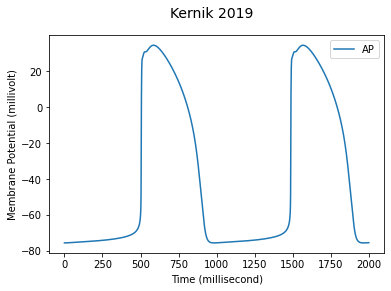

--- 1.5609734058380127 seconds ---


In [8]:
'''
Kernik 2019
'''
model_path = "./mmt-model-files/kernik-2019.mmt" 
start_time = time.time()
model = ModelJK(model_path) 
model.name = "Kernik 2019"
times = np.linspace(0,2000,10000)
model.set_times(times)
d = model.simulate(['engine.pace'], plot=True)    
print("--- %s seconds ---"%(time.time()-start_time))

Times has been set.


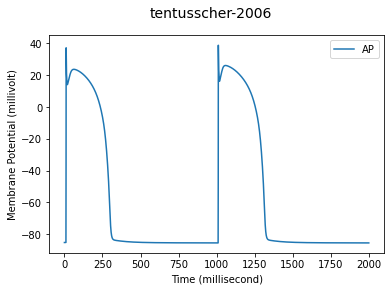

--- 1.4858300685882568 seconds ---


In [7]:
'''
Tentusscher 2006
'''
model_path = "./mmt-model-files/tentusscher-2006.mmt" 

start_time = time.time()
model = ModelJK(model_path) 
times = np.arange(30)
times = np.linspace(0,2000,10000)
model.set_times(times)
d = model.simulate(['engine.pace'], plot=True)    
print("--- %s seconds ---"%(time.time()-start_time))